In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle

In [14]:
# pth to the directory containing the data
# pth = '/Users/mithileshvaidya/Downloads/100_ms_scratch'
# pth = '/Users/mithileshvaidya/Downloads/100_ms_peakearly'
# pth = '/Users/mithileshvaidya/Downloads/100_ms_nocnn'
# pth = '/Users/mithileshvaidya/Downloads/100_ms_cnn'
# pth = '/Users/mithileshvaidya/Downloads/100_ms_oneuni'
# pth = '/Users/mithileshvaidya/Downloads/100_ms_pt'
pth = '/Users/mithileshvaidya/Code/VAE/revised/results_final/vae_gp/100_ms'
# iterate over folders in the directory
results_dict = {}
z_plots = {}
for folder in os.listdir(pth):
    # check if the folder is a directory
    if os.path.isdir(os.path.join(pth, folder)):
        # print(folder)
        # each folder has a convention as follows: vae_gp_[1, 1, 1]_diagonal_gru_8_2_True_noise_0.01_rbfscale_0.5_smoothing_3_monotonic_1_1_10_[True, True, False]_3_entropy_None_seed_0cnn_0_1_None
        # extract all the text between seed_ and cnn
        if '[1, 1, 1]' not in folder or 'gru_8_2' not in folder:
        # if '[2, 2, 2]' not in folder or 'gru_8_2' not in folder:
        # if '[2, 2, 2]' not in folder or 'gru_8_1' not in folder:        
            # print(folder)
            continue
        seed_cnn = folder.split('seed_')[1].split('cnn')[0]
        # read the all_results.pkl file
        with open(os.path.join(pth, folder, 'all_results.pkl'), 'rb') as f:
            results = pickle.load(f)
        # # store the results in the dictionary
        results_dict[seed_cnn] = (results[3], results[5], results[7], (results[5]+results[7])/2)
        # read the z_avg.png image
        img = plt.imread(os.path.join(pth, folder, 'z_avg.png'))
        z_plots[seed_cnn] = img
print(len(z_plots))

30


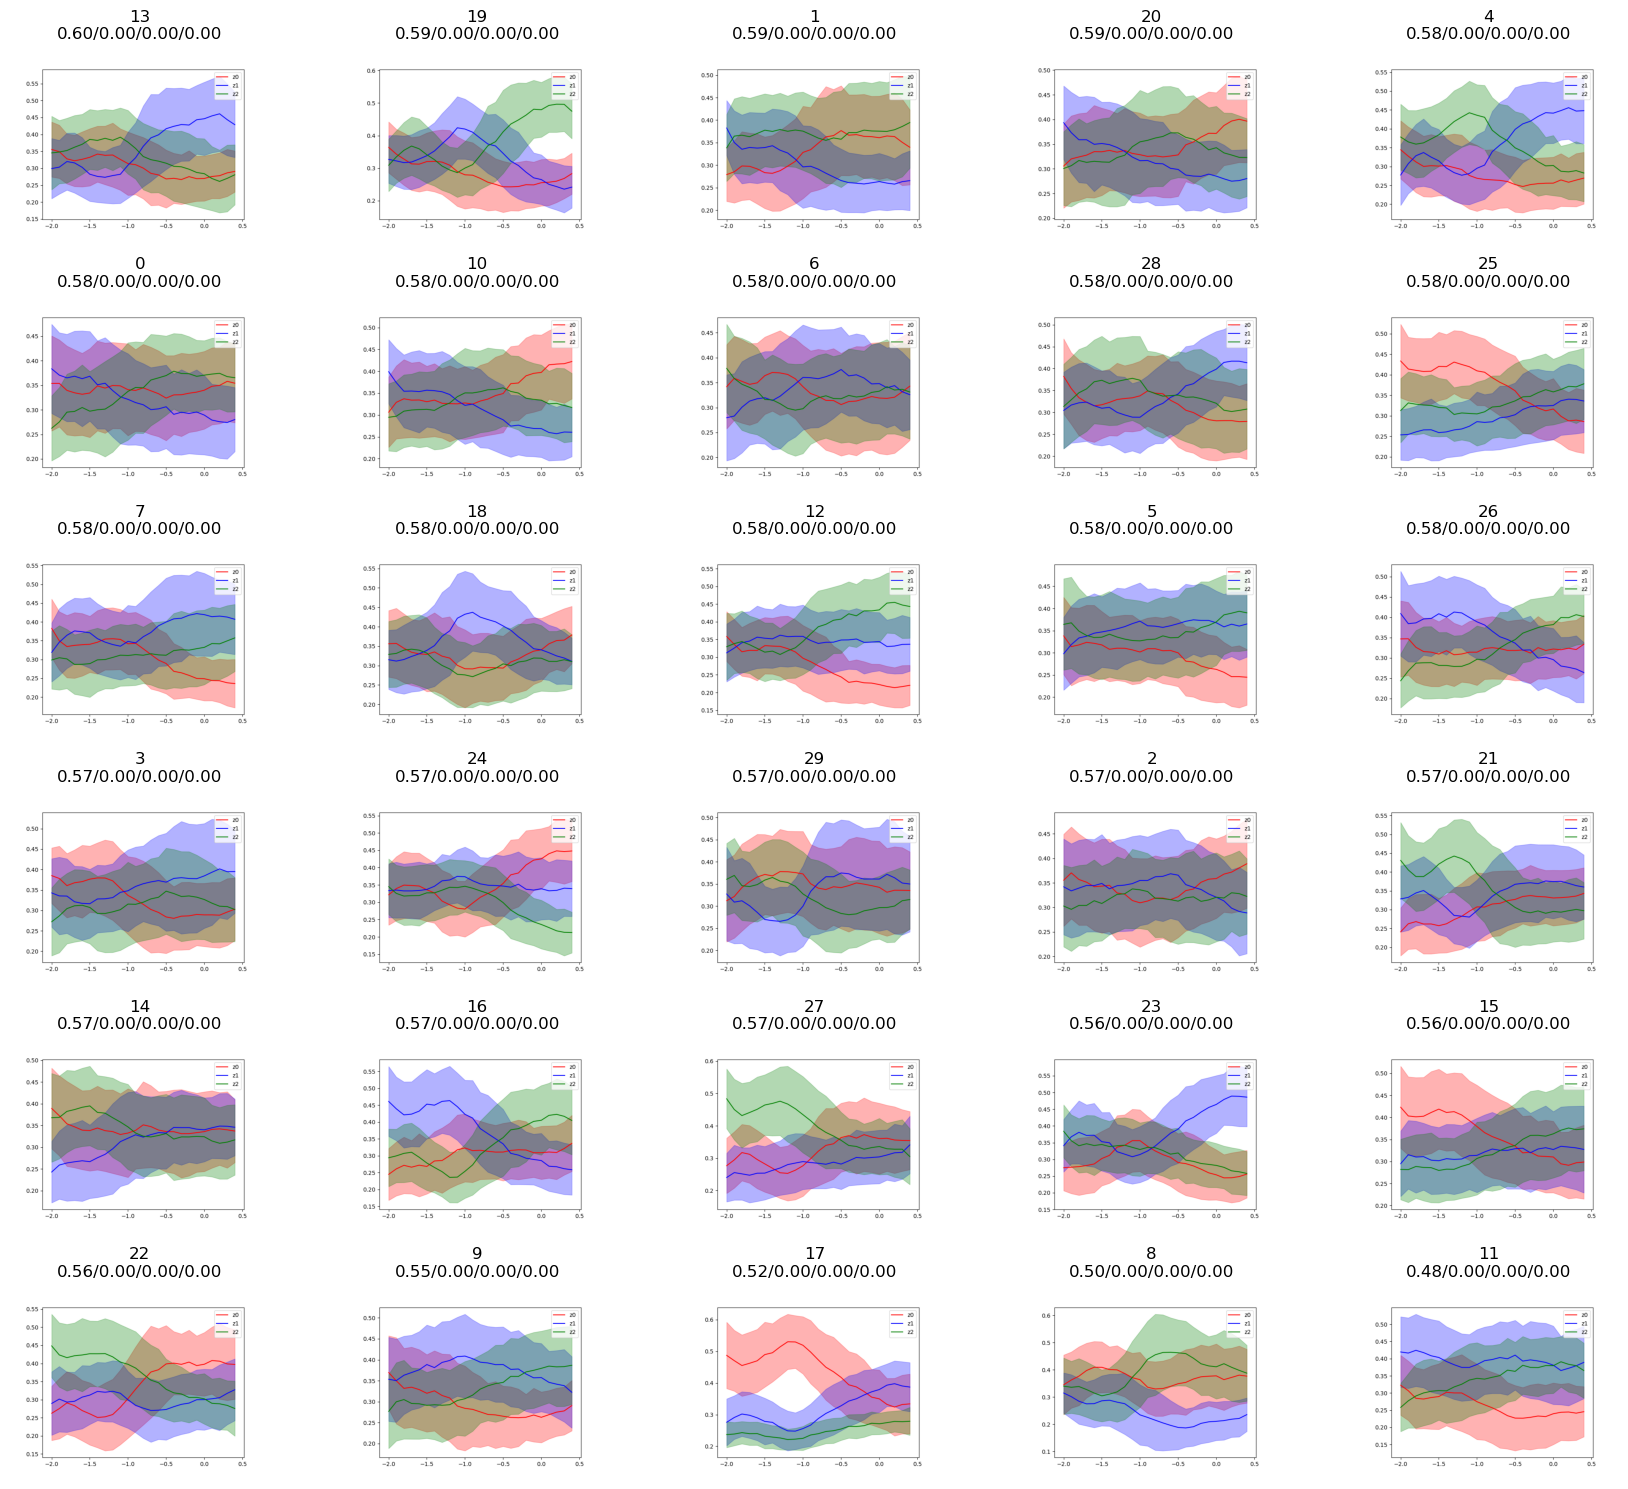

In [15]:
# arrange in descending order of the last value in the tuple
results_dict = dict(sorted(results_dict.items(), key=lambda x: (x[1][3]+x[1][0])/2, reverse=True))
# plot all z_plots in a grid
fig, axs = plt.subplots(6, 5, figsize=(18, 15), layout="tight")
for i, (key, res_vals) in enumerate(results_dict.items()):
    ax = axs[i // 5, i % 5]
    ax.imshow(z_plots[key])    
    ax.axis('off')     
    ax.set_title(f'{key}\n{res_vals[0]:.2f}/{res_vals[1]:.2f}/{res_vals[2]:.2f}/{res_vals[3]:.2f}')    
    # tight layout
# plt.tight_layout()


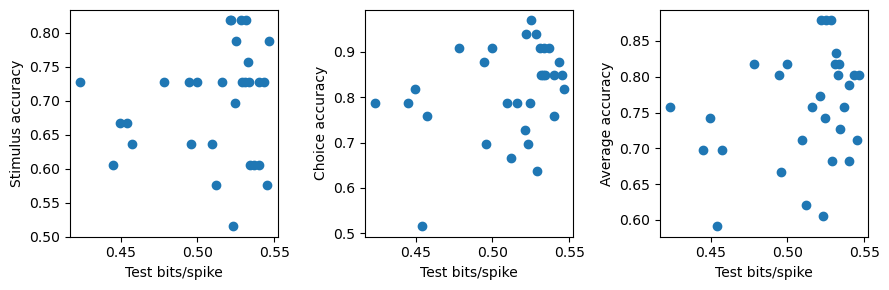

In [11]:
bs = [x[0] for x in results_dict.values()]
stim = [x[1] for x in results_dict.values()]
choice = [x[2] for x in results_dict.values()]
stim_choice_avg = [x[3] for x in results_dict.values()]
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

axs[0].scatter(bs, stim)
axs[0].set_xlabel('Test bits/spike')
axs[0].set_ylabel('Stimulus accuracy')
axs[1].scatter(bs, choice)
axs[1].set_xlabel('Test bits/spike')
axs[1].set_ylabel('Choice accuracy')
axs[2].scatter(bs, stim_choice_avg)
axs[2].set_xlabel('Test bits/spike')
axs[2].set_ylabel('Average accuracy')
plt.tight_layout()